<a href="https://colab.research.google.com/github/ananya1105/EDA-of-Medical-Cost-Insurance-data---Kaggle/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#We will write a function to get the data set from the Yan Leucun website.
import urllib.request as url
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt
def load_dataset():
    def download(filename, source ='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading ",filename)
        url.urlretrieve(source+filename, filename)
    def load_mnist_images(filename):
        if not (os.path.exists(filename)):
          download(filename)
        with gzip.open(filename, 'rb') as f:
          data = np.frombuffer(f.read(), np.uint8, offset=16)
          data = data.reshape(-1,1,28,28)
          return data/np.float32(256)
    def load_mnist_labels(filename):
        if not os.path.exists(filename):
          download(filename)
        with gzip.open(filename, 'rb') as f:
          data = np.frombuffer(f.read(), np.uint8, offset = 8)
          return data
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    Y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    Y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    
    return X_train, Y_train, X_test, Y_test




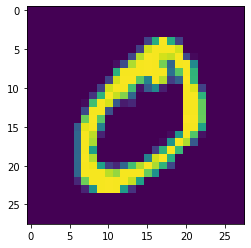

In [0]:

X_train, Y_train, X_test, Y_test = load_dataset()
plt.show(plt.imshow(X_train[1][0]))

In [0]:
import lasagne
import theano
import theano.tensor as ten
#We are using Lasagne and Theano
def build_NN(input_var = None):
  l_in = lasagne.layers.InputLayer(shape=(None,1,28,28), input_var = input_var)
#Adding the dropout layer, there will be 20% drop out
  l_in_drop = lasagne.layers.DropoutLayer(l_in, p=0.2)
#Each layer will take input from the previous layer
#Here we are adding a layer with 800 nodes.
  l_hid1 = lasagne.layers.DenseLayer(l_in_drop, num_units=800, nonlinearity = lasagne.nonlinearities.rectify, W = lasagne.init.GlorotUniform())
#GlorotUniform scheme is a way to initialize weights randomly.
#Now we will add a dropout layer of 50%
  l_hid1_drop = lasagne.layers.DropoutLayer(l_hid1, p=0.2)
#Add another layer.
  l_hid2 = lasagne.layers.DenseLayer(l_hid1_drop, num_units=800, nonlinearity = lasagne.nonlinearities.rectify, W = lasagne.init.GlorotUniform())
  l_hid2_drop = lasagne.layers.DropoutLayer(l_hid2, p=0.2)
  l_hid3 = lasagne.layers.DenseLayer(l_hid2_drop, num_units=800, nonlinearity = lasagne.nonlinearities.rectify, W = lasagne.init.GlorotUniform())
  
  l_out = lasagne.layers.DenseLayer(l_hid3, num_units=10, nonlinearity = lasagne.nonlinearities.softmax)
  return l_out
input_var = ten.tensor4('inputs')
target_var = ten.ivector('targets')
network = build_NN(input_var)
#Training the model
#Computing the error at the present iteration
prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.mean()

#We will tell the network how to update the weights based upon the error function
params = lasagne.layers.get_all_params(network, trainable = True)
#Updates is the inceremental changes in the weights params
updates = lasagne.updates.nesterov_momentum(loss, params, learning_rate = 0.01, momentum = 0.9)
#Nesterov Momentum Function is the extension of the concept of Stochastic Gradient Descent
#Theano is used to compile a function that represents a single training step
train_fn = theano.function([input_var, target_var], loss, updates = updates)


In [0]:
#Feeding the training data to the neural network
num_training_steps = 200
for step in range(num_training_steps):
  train_err = train_fn(X_train, Y_train)
  print("Current step is "+str(step))
  print(train_err)

Current step is 0
0.3806457591050133
Current step is 1
0.38166444983042797
Current step is 2
0.37851800677091274
Current step is 3
0.3787862646130188
Current step is 4
0.3747716491183873
Current step is 5
0.3765200351795871
Current step is 6
0.37525901738178935
Current step is 7
0.3780122895369639
Current step is 8
0.37655794909896834
Current step is 9
0.37954079777610533
Current step is 10
0.3738557486386867
Current step is 11
0.3748028916596428
Current step is 12
0.37403146484371763
Current step is 13
0.37191091526453013
Current step is 14
0.3684179319610229
Current step is 15
0.3739415101540589
Current step is 16
0.36984883120984846
Current step is 17
0.36705192856183055
Current step is 18
0.3699525565585961
Current step is 19
0.3682576703137333
Current step is 20
0.36859400668625186
Current step is 21
0.3679730366522121
Current step is 22
0.36518924579399675
Current step is 23
0.3646341674175495
Current step is 24
0.364083125753982
Current step is 25
0.36877555478789725
Current ste

KeyboardInterrupt: ignored

In [0]:
#We will check how the output is for one image

test_prediction = lasagne.layers.get_output(network)
val_fn = theano.function([input_var],test_prediction)
val_fn([X_test[0]]) 
Y_test[0]
test_prediction = lasagne.layers.get_output(network, deterministic = True)
test_acc = ten.mean(ten.eq(ten.argmax(test_prediction, axis = 1),target_var),dtype=theano.config.floatX)
acc_fn = theano.function([input_var, target_var], test_acc)
acc_fn(X_test, Y_test)

array(0.9252)

In [0]:
pip install --upgrade https://github.com/Theano/Theano/archive/master.zip

     - 29.5MB 26.3MB/s
  Created wheel for Theano: filename=Theano-1.0.4+unknown-cp36-none-any.whl size=2666479 sha256=4df52a7f43b471aef0d1476fece06752ebf7c08d49edd408b2a9d1057880a7e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-gqhnxe0o/wheels/33/73/96/0ed263c62a86e2485ea634e0d3ae8169d50fd66e3b252541db
Successfully built Theano
  Found existing installation: Theano 1.0.4+unknown
    Uninstalling Theano-1.0.4+unknown:
      Successfully uninstalled Theano-1.0.4+unknown


In [0]:
pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

     | 2.0MB 1.6MB/s
  Created wheel for Lasagne: filename=Lasagne-0.2.dev1-cp36-none-any.whl size=122750 sha256=d7f8f60a8bc228dc5a55ce680b17fd67f309030914665bb2d3eadd14cf444b1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-rzfg09ri/wheels/ca/4a/00/87f1777b229481fe76562df7c0cfb993bc88ed0cc37e3f0ed4
Successfully built Lasagne
  Found existing installation: Lasagne 0.2.dev1
    Uninstalling Lasagne-0.2.dev1:
      Successfully uninstalled Lasagne-0.2.dev1


In [0]:
pip install tensor

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 3.1MB 14.5MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 296kB 55.5MB/s 
     |████████████████████████████████| 174kB 55.1MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 9.7MB 43.3MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
  Created wheel for tensor: filename=tensor-0.3.6-cp36-none-any.whl size=71570 sha256=d400678f10ad112a9b376ec59b4d511217d06db1e014dcd5396e124228bf9fd8
  Stored in directory: /root/.cache/pip/wheels/32/ba/ac/dbd210e9db9e5d549b3d98c57713684c5768298f259b1925ef
  Created wheel for construct: filename=construct-2.9.45-cp36-none-any.whl size=58289 sha256=28a01cb6ab2af5f20d96e6ad1d4ef3650f82f731da75588aff0a9dad8539c64a
  Stored in directory: /root/.cache/pip/wheels/22/73/01/9e7468947349b14ce8f07c3fc7b430b3a

In [0]:
print(lasagne.layers)

<module 'lasagne.layers' from '/usr/local/lib/python3.6/dist-packages/lasagne/layers/__init__.py'>
